In [ ]:
!pip install matplotlib deap

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

In [ ]:
num_locations = 20
locations = [(random.randint(0, 100), random.randint(0, 100)) for i in range(num_locations)]
depot = (50, 50)
num_vehicles = 3

In [ ]:
# Genetic Algorithm setup
creator.create("FitnessMin", base.Fitness, weights = (-1.0, -1.0))
creator.create("Individual", list, fitness = creator.FitnessMin)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [ ]:
toolbox = base.Toolbox()
toolbox.register("indices", random.sample, range(num_locations), num_locations)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [ ]:
def evalVRP(individual):
  total_distance = 0;
  distances = []
  for i in range(num_vehicles):
    vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
    vehicle_distance = sum(np.linalg.norm(np.array(vehicle_route[k+1]) - np.array(vehicle_route[k])) for k in range(len(vehicle_route)-1))
    total_distance += vehicle_distance
    distances.append(vehicle_distance)
  balance_penalty = np.std(distances)
  return total_distance, balance_penalty

In [ ]:
# Genetic Operators
toolbox.register("evaluate", evalVRP)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb = 0.05)
toolbox.register("select", tools.selTournament, tournsize = 3)

In [ ]:
def plot_routes(individual, title = "Routes"):
  plt.figure()
  for (x, y) in locations:
    plt.plot(x, y, 'bo')
  plt.plot(depot[0], depot[1], 'rs')

  for i in range(num_vehicles):
    vehicle_route = [depot] + [locations[individual[j]] for j in range(i, len(individual), num_vehicles)] + [depot]
    plt.plot(*zip(*vehicle_route), '-')

  plt.title(title)
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.show()

In [ ]:
# Running the Genetic Algorithm
def main():
  random.seed(42)
  pop = toolbox.population(n = 300)
  hof = tools.HallOfFame(1)

  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("avg", np.mean)
  stats.register("min", np.min)

  algorithms.eaSimple(pop, toolbox, 0.7, 0.2, 300, stats = stats, halloffame = hof)

  plot_routes(hof[0], "Optimal Route")
  return pop, stats, hof

gen	nevals	avg    	min    
0  	300   	616.771	4.21771
1  	213   	596.863	1.67715
2  	243   	589.639	1.67715
3  	232   	580.213	1.03374
4  	233   	572.673	3.7028 
5  	218   	566.929	3.39833
6  	213   	560.563	2.59799
7  	233   	554.988	4.58346
8  	219   	553.078	4.10251
9  	209   	540.128	4.9502 
10 	224   	535.841	3.49718
11 	230   	533.838	6.70831
12 	230   	523.173	2.54458
13 	217   	501.878	4.3941 
14 	231   	493.874	6.46787
15 	250   	474.631	3.34419
16 	238   	455.335	2.74793
17 	236   	443.862	1.88814
18 	225   	435.279	7.03221
19 	225   	424.666	5.0122 
20 	209   	415.195	11.5033
21 	232   	409.896	4.84934
22 	237   	404.814	14.5217
23 	217   	404.827	7.04721
24 	227   	399.859	13.0876
25 	246   	395.327	23.1486
26 	233   	386.927	23.9331
27 	219   	380.977	15.92  
28 	229   	376.961	13.0301
29 	223   	368.663	3.02226
30 	238   	363.137	14.1085
31 	225   	356.385	21.7805
32 	221   	356.304	4.14977
33 	243   	347.99 	5.23442
34 	232   	346.392	12.3873
35 	244   	345.832	5.23442
3

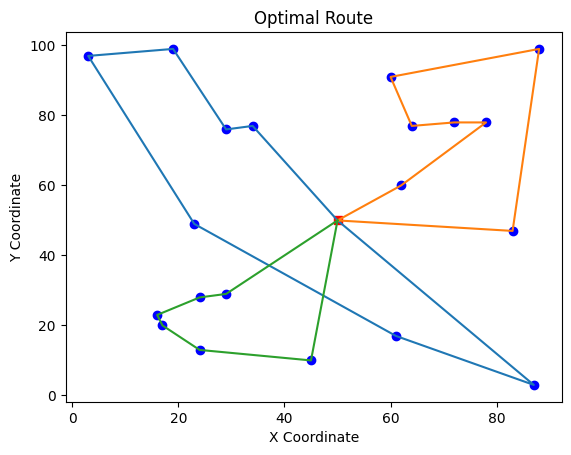

In [ ]:
if __name__ == "__main__":
  main()